<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2022</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Tuesday, April 28 • 17:00 - 19:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://app.slack.com/client/T094HBB9T/C039C3J7Y1M">#t22-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ">https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Regularization - concepts explained

Regularisation drives the model where the data are too weak. In order to explain different kinds of regularization (also called constraints), we use a very simple mapping forward operator: The values at certain positions are picked.

In [2]:
from pygimli.frameworks import PriorModelling

# self.ind = [mesh.findCell(po).id() for po in pos]
# self.J = pg.SparseMapMatrix()
# self.J.resize(len(self.ind), mesh.cellCount())
# for i, ii in enumerate(self.ind):
#     self.J.setVal(i, ii, 1.0)
# self.setJacobian(self.J)

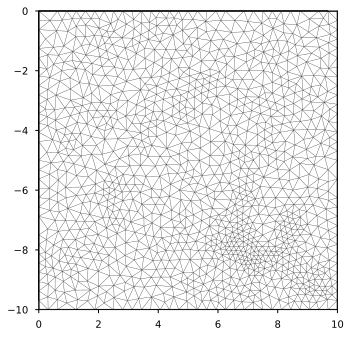

In [3]:
import pygimli.meshtools as mt
# We create a rectangular domain and mesh it with small triangles
rect = mt.createRectangle(start=[0, -10], end=[10, 0])
mesh = mt.createMesh(rect, quality=34.5, area=0.1)
pg.show(mesh);

In [4]:
pos = [[3, -3], [7, -7]]
vals = np.array([20., 15.])
fop = PriorModelling(mesh, pos)
inv = pg.Inversion(fop=fop)

24/04/22 - 22:55:21 - pyGIMLi - INFO - Found 1 regions.
24/04/22 - 22:55:21 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:55:21 - pyGIMLi - INFO - Creating forward mesh from region infos.


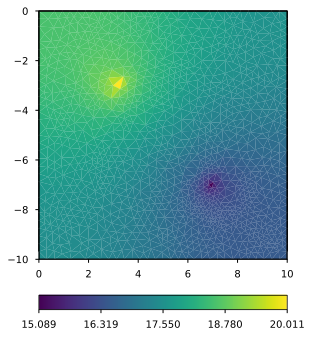

In [4]:
inv.setRegularization(cType=1)
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10)
pg.show(mesh, result);

24/04/22 - 22:55:22 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:55:22 - pyGIMLi - INFO - Setting starting model as reference!


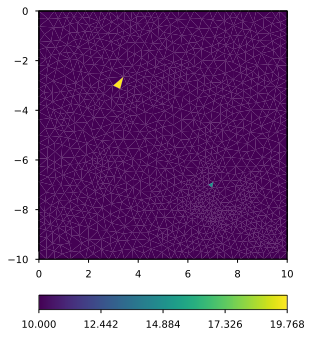

In [5]:
inv.setRegularization(cType=0)  # damping difference to starting model
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10, isReference=True)
pg.show(mesh, result);

24/04/22 - 22:55:23 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:55:23 - pyGIMLi - INFO - Setting starting model as reference!


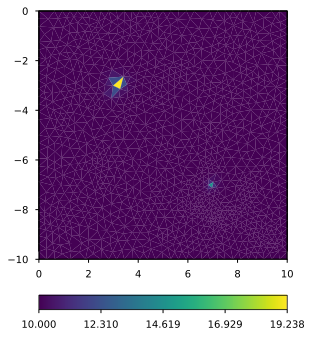

In [6]:
inv.setRegularization(cType=10)  # mix of 1st order smoothing and damping
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10, isReference=True)
pg.show(mesh, result);

24/04/22 - 22:55:25 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:55:25 - pyGIMLi - INFO - Setting starting model as reference!


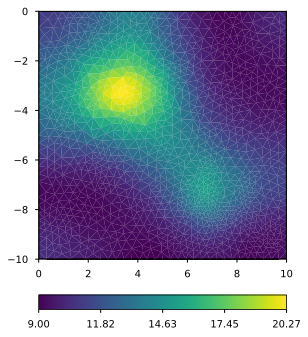

In [7]:
inv.setRegularization(cType=2)  # 2nd order smoothing and damping
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10, isReference=True)
pg.show(mesh, result);

24/04/22 - 22:59:05 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:59:05 - pyGIMLi - INFO - Setting starting model as reference!
24/04/22 - 22:59:05 - pyGIMLi - INFO - Createing GeostatisticConstraintsMatrix for region 1 with: I=[2, 2, 2], dip=0, strike=0
24/04/22 - 22:59:08 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition: 2.1s
24/04/22 - 22:59:08 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\12654738667981461255


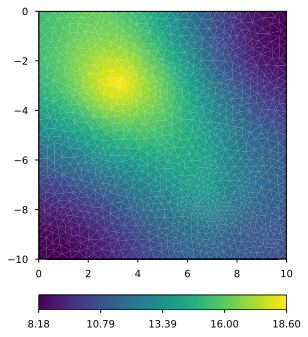

In [11]:
inv.setRegularization(correlationLengths=[2, 2, 2])
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10, isReference=True)
pg.show(mesh, result);

24/04/22 - 22:59:40 - pyGIMLi - INFO - Homogeneous starting model set to: 10.0
24/04/22 - 22:59:40 - pyGIMLi - INFO - Setting starting model as reference!
24/04/22 - 22:59:40 - pyGIMLi - INFO - Createing GeostatisticConstraintsMatrix for region 1 with: I=[2, 2, 2], dip=-45, strike=0
24/04/22 - 22:59:43 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition: 2.0s
24/04/22 - 22:59:43 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\13600516778374523041


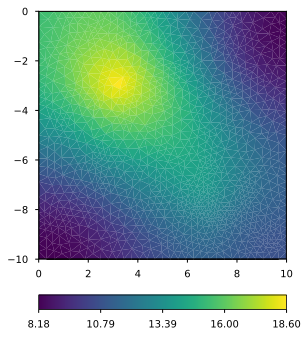

In [12]:
inv.setRegularization(correlationLengths=[2, 2, 2], dip=-45)
result = inv.run(vals, np.ones_like(vals)*0.03, startModel=10, isReference=True)
pg.show(mesh, result);

In [9]:
#pg.show(fop.constraints());